# IIR-Filterentwurf

<img style="float: right; margin:5px 0px 0px 10px" src="img/dsp.jpg" width="400">


## Inhalt  

<table style="width:256px; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-intro.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#intro'>1. Wiederholung</a>
    </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-butterworth.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#idtft'>2. Butterworh-Filter</a>
    </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-chebishev.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#idft'>3. Chebyshev-Filter</a>
    </td>
  </tr>
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-intro.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#verz'>4. ToDo: Vorverzerrung</a>
    </td>
  </tr>  
</table>



---- 

<a id='intro'></a><div><img src="img/IMG-intro.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">1. Wiederholung </h2></div>

Im Notebook 1.1 haben wir die Implementierung von FIR-Filtern diskutiert. FIR-Filter bietet viele Vorteile wie lineare Phase ohne Stabilitätsprobleme. Zur Erinnerung: ein typische FIR hat die Differenzengleichung
\begin{equation*}
y_{\text{FIR}}(k) = \sum_{i=0}^{M}a_{i} x(k-i).
\end{equation*}  
Je länger der Filter/je höher die Filterordnung ($ M\rightarrow \infty $), desto besser kann der ideale Amplitudenfrequenzgang angenähert werden. Die z.T. hohe Anzahl an Koeffzienten kann ein Problem werden, wenn dadurch die Einschwingzeit des Filters zu lang ist. Eine Alternative bieten die IIR-Filter (Infinite Impulse Response Filter). Der größte Unterschied zwischen IIR- und FIR-Filtern besteht darin, dass die Ausgabe $y(k)$ zum aktuellen Abtastwertindex $k$ nicht nur von der Eingabe $x(k)$, sondern auch von voeherigen Abtastwerten der Ausgabe $y(k-1), y(k-2),\dots$ selbst abhängt. Die Standardform eines IIR-Filters lautet damit
\begin{equation*}
y_{\text{IIR}}(k) = \sum_{i=0}^{M} a_{i} x(k-i) - \underbrace{\sum_{i=0}^{N} b_{i} y(k-i)}_{\text{neuer, rekursiver Teil}}
\end{equation*}  

Die grundlegende Struktur von IIR-Filtern und dessen Darstellungsformen sind ebenfalls zur Erinnerung in der folgenden Abbildung noch einmal zusammengefasst (siehe dazu auch die Vorlesungsfolien Thema1-Filter sowie die erste Übung).

![iir](img/iir.png)

__Der Unterschied zwischen FIR- und IIR-Systemen:__  

- FIR:  
    - Impulsantwort hat eine endliche Länge
    - keine Rückkopplungsschleife/rekursiven Teil
    - kein Pol im Konvergenzbereich (Stabilität)
- IIR:  
    - Impulsantwort hat eine unendliche Länge
    - rekursive Struktur (Rückkopplungsschleife)
    - mindestens ein Pol ( $ b_{i} \neq  0 $ )

Im Allgemeinen wird beim Entwerfen eines digitalen IIR-Filters zuerst ein entsprechender analoger Filter entworfen, und dann wird der analoge Filter durch eine [bilineare Transformation](https://en.wikipedia.org/wiki/Bilinear_transform) oder [Impulsantwort-Invarianzmethode](https://en.wikipedia.org/wiki/Impulse_invariance) in einen digitalen Filter umgewandelt. Dies bedeutet, dass wir die Filterübertragungsfunktion $H(s)$ in der komplexen Ebene von $s$ entwerfen müssen. Wenn sich alle Pole von $H(s)$ in der linken Halbebene von $s$ befinden, ist der Filter stabil. Die Komplexität liegt in der Bestimmung der Übertragungsfunktion des Analogfilters. 

Die einzelnen Implementierungsschritte umfassen dabei:
- Auswahl des Filtertyp, z.B. Butterworth oder Chebyshev 
- Wahl der Entwurfsparameter (\omega_c, Dämpfung, u.a.), 
- Pole mit den Gleichungen für $\phi_n$, $\gamma$ und $p_n$ bestimmen 

Nachfolgend soll der IIR-Filterentwurf für den Typ Butterworth und Chebychev durchgeführt und diskutiert werden. Die Gleichungen zur Bestimmung der Pole werden im Foliensatz zu Thema1-Filter erwähnt. In der Anwendung macht es mehr Sinn, die entsprechenden Funktionen im __[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)__ Modul zu benutzen.

----

<a id='butterworth'></a><div><img src="img/IMG-butterworth.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">2. Butterworth-Filter </h2></div>

Butterworth Filter besitzen einen maximal steilen Übergang zwischen Durchlass- und Sperrbereich bei absolut glattem Amplitudengang im Duchlassbereich (kein Überschwingen).   

Zuerst wird ein Bandpassfilter mittels [signal.butter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) entworfen. Die Abtastfrequenz $f_s$ beträgt 1000 Hz. Frequenzkomponenten unter 130 Hz und über 440 Hz sollen herausgefiltert werden, d.h., die Grenzfrequenzen $f_{c,\text{lower}}$ und $f_{c,\text{upper}}$ des Bandpassfilters betragen 130 Hz bis 440 Hz. Das Passbandintervall ist dann $w_{\text{pass}} = [130, 440]\,\mathrm{Hz}$. Die Frequenzgrenzen werden in signal.butter() in Hz angegeben, auch wenn ein Digitalfilter entworfen wird (wie in diesem Falle). Streng genommen entspricht dies dem Intervall $\Omega = [0.13, 0.44]$ rad (normiert auf die Grenzfrequenz $f_s$), wodurch die Frequenzachse von 0 bis $\pi$ laufen würde. Oft es ist aber übersichtlicher, wenn die Frequenzachse weiterhin in Hz oder rad/s dargestellt ist. In diesem Falle ist natürlich die Hälfte der Abtastfrequenz $f_s/2$ die Grenze. Außerdem ist zu erwähnen, dass ein analoger Butterworth-Filter keine Nullstellen besitzt (sog. "All-Pole-Filter"), bei der Transformation zum Digitalfilter aber - abhängig von der Transformation (Bilinear, Pol-Nullstellen-Abbildung z.B.) -Nullstellen hinzukommen.

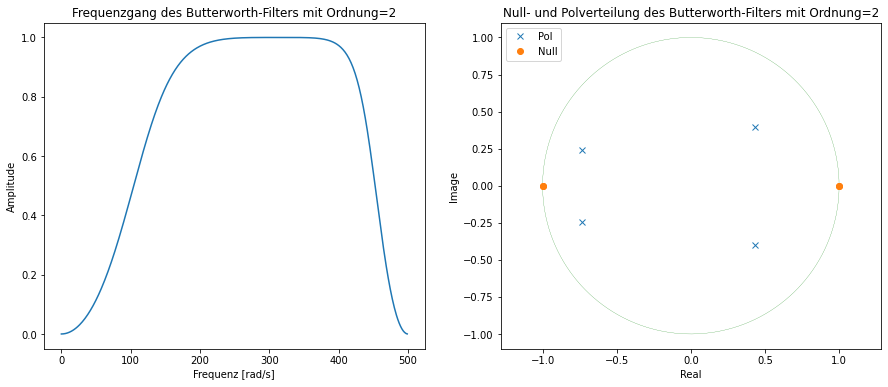

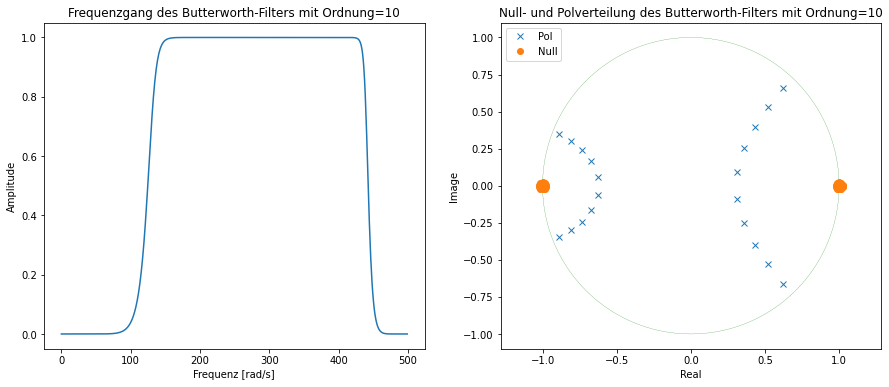

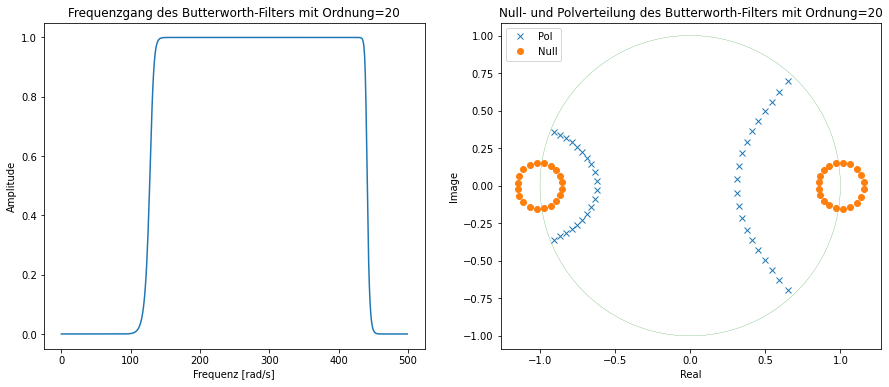

In [3]:
'''
Beispiel: Butterworth Bandpassfilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 10, 20):  # Ordnung
    
    # Parameter
    fPass_Hz = [130, 440] # Grenzfrequenzen
    fs_Hz = 1000          # Abtastfrequenz

    # Filterentwurf
    b, a = signal.butter(n, fPass_Hz, 'Bandpass', analog=False, fs=fs_Hz)  # Filterkoeffizienten
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang des Filters
    z, p, k = signal.tf2zpk(b, a)        # Pol-Nullstellen-Verteilung

    # Plot
    plt.subplot(121)
    # plt.semilogx(w, abs(h))  # Log-plot
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Butterworth-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Butterworth-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

Zusätzlich gibt es die Funktion [signal.buttord()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html) zur Auswahl einer geeigneten Filterordnung in Abhängigkeit von festgelegten Randbedingungen bezüglich der Dämpfung im Durchlass- und Sperrbereich. Nachfolgend soll ein Bandpassfilter mittels dieser Funktion entworfen werden, damit die Dämpfung im Durchlassbereich innerhalb von 10 dB von 140 Hz bis 430 Hz liegt, während mindestens sie im Sperrbereich (außerhalb von $[130, 440]$ Hz) mindestens -40 dB beträgt.

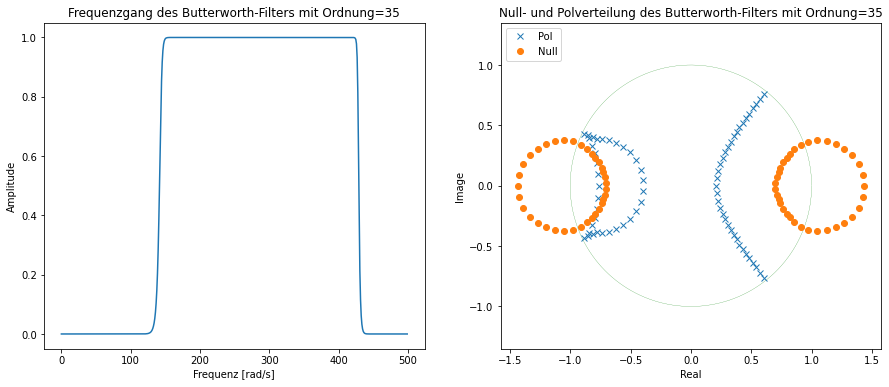

In [6]:
'''
Beispiel: Butterworth Bandpassfilterentwurf mittels Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 1000  # Abtastfrequenz
n, wn = signal.buttord([140, 430], [130, 440], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.butter(n, wn, 'Bandpass', False, fs=fs_Hz)  # Filterkoeffizienten
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang des Filters
z, p, k = signal.tf2zpk(b, a)        # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Butterworth-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Butterworth-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

----

<a id='chebyshev'></a><div><img src="img/IMG-chebyshev.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">3. Chebyshev-Filter </h2></div>

Beim Chebychev-Filter fällt die Amplitude im Übergangsbereich steiler ab als beim Butterworth-Filter. Dieser Vorteil wird durch eine gewisse
(einstellbare) Welligkeit im Durchlassbereich erkauft (unterhalb der Grenzfrequenz). 

Ähnlich wie Butterworth-Filterentwurf, gibt es auch für den Chebyshev-Filterentwurf Funktionen zur Ordnungselektion, daher können diese ganz analog dazu verwenden werden. Alle Details können Sie unten [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html) finden.   

Außerdem gibt es eine allgemeine Funktion [signal.iirfilter()]() zum IIR-Filterentwurf, Im Nachfolgenden sollen diese Funktionen benutzt werden, um einen Chebyshev-Typ-I und -II Digitalfilter mit einer Abtastfrequenz von $f_s = 8000$ Hz zu entwerfen. Chebyshev Filter Typ I weisen eine Welligkeit im Passband auf, während Typ II Filter die Welligkeit im Stoppband haben.

- __Chebyshev Typ I__

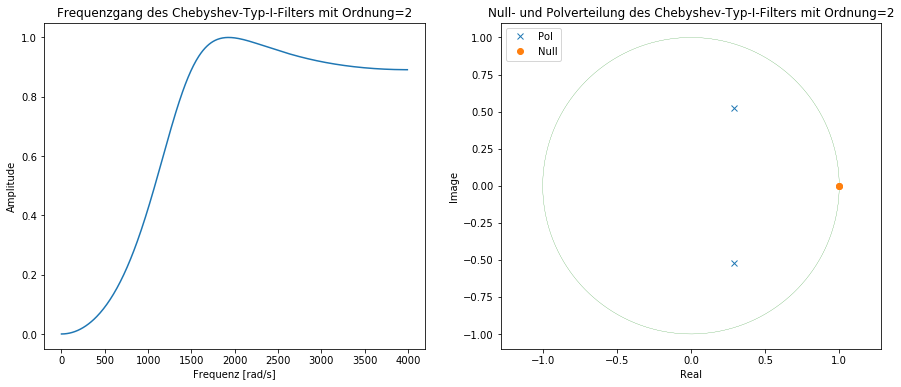

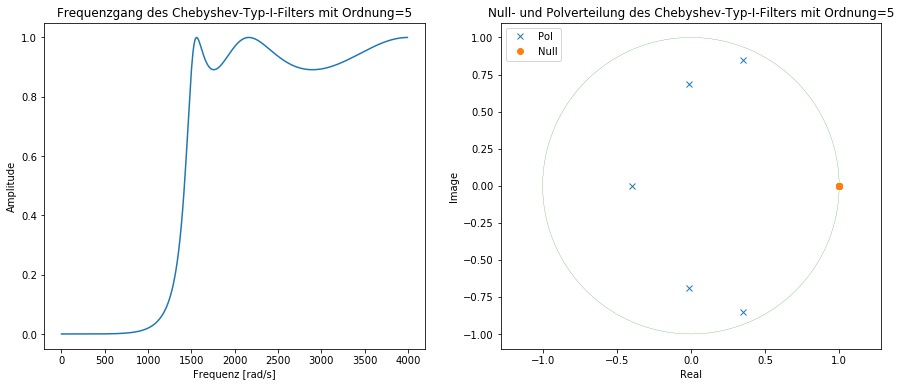

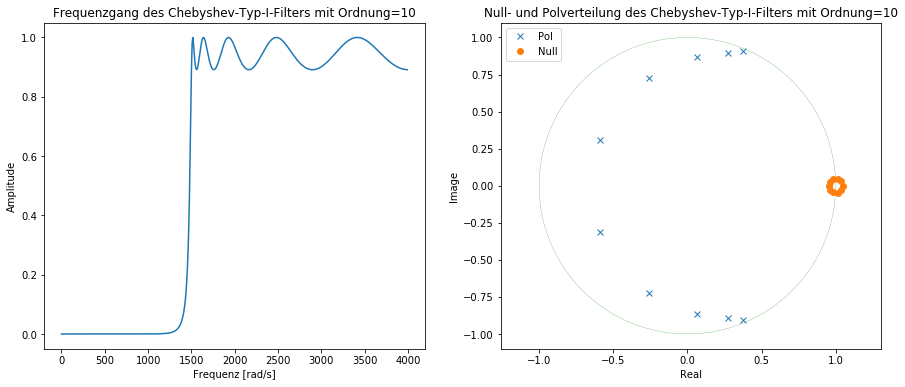

In [3]:
'''
Beispiel: Chebyshev Typ-I Hochpassfilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 5, 10):  # Ordnung
    
    # Parameter
    wn = 1500  # Grenzfrequenz
    fs_Hz = 8000  # Abtastfrequenz

    # Filterentwurf
    b, a = signal.iirfilter(n, wn, rp=1, btype='highpass', analog=False, ftype='cheby1', fs=fs_Hz)
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
    z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

    # Plot
    plt.subplot(121)
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

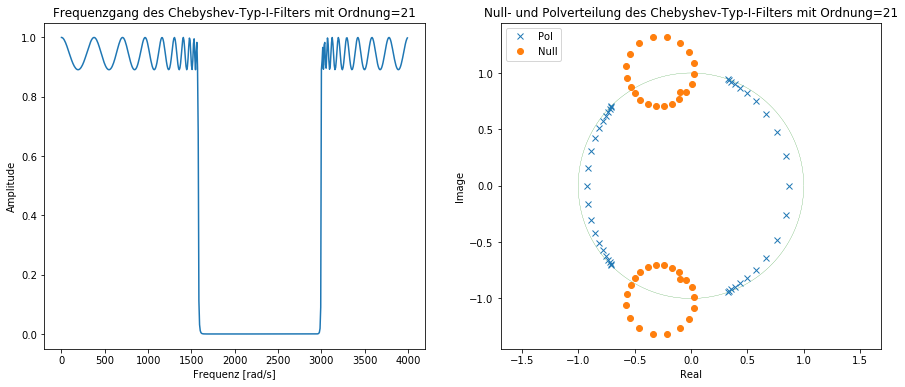

In [4]:
'''
Beispiel: Chebyshev Typ-I Bandsperrfilterentwurf mit Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 8000  # Abtastfrequenz
n, wn = signal.cheb1ord([1500, 3000], [1590, 2990], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.iirfilter(n, wn, rp=1, btype='bandstop', analog=False, ftype='cheby1', fs=fs_Hz)
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

- __Chebyshev Typ II__

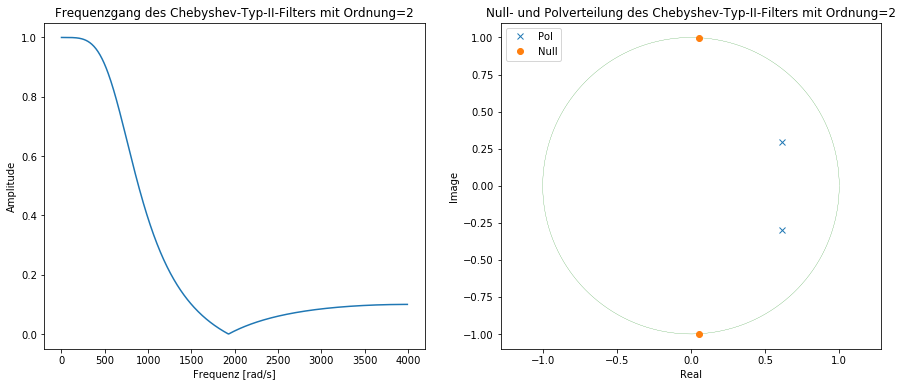

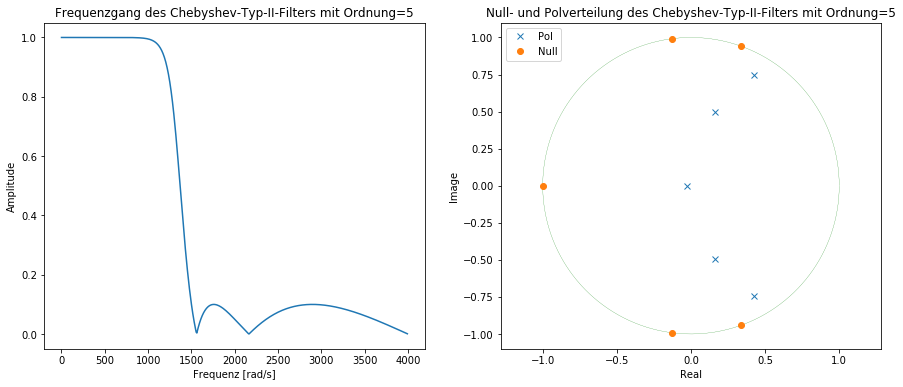

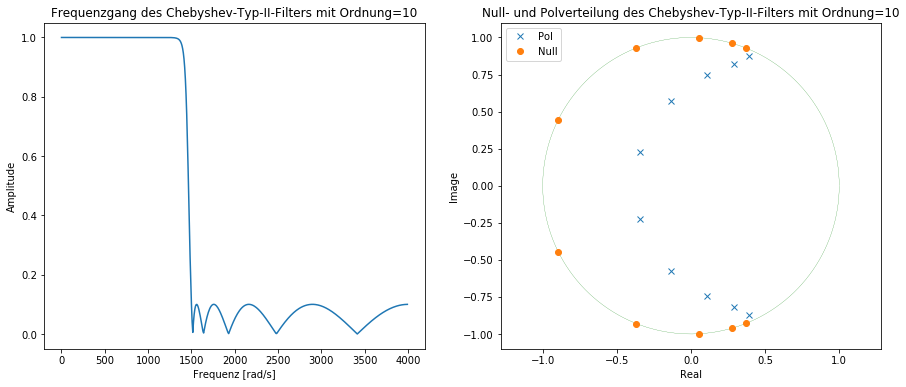

In [5]:
'''
Aufgabe: Chebyshev Typ-II Tiefpassilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 5, 10):  # Ordnung
    
    # Parameter
    wn = 1500  # Grenzfrequenz
    fs_Hz = 8000  # Abtastfrequenz

    # Filterentwurf
    b, a = signal.iirfilter(n, wn, rs=20, btype='lowpass', analog=False, ftype='cheby2', fs=fs_Hz)
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
    z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

    # Plot
    plt.subplot(121)
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

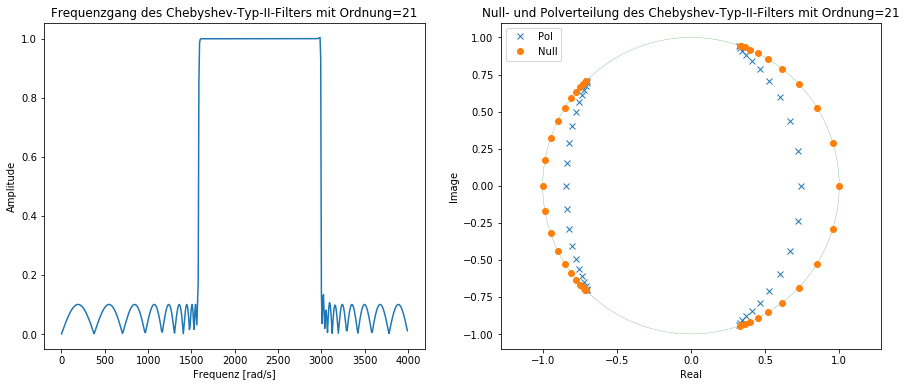

In [6]:
'''
Aufgabe: Chebyshev Typ-II Bandpassfilterentwurf mit Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 8000  # Abtastfrequenz
n, wn = signal.cheb2ord([1590, 2990], [1500, 3000], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.iirfilter(n, wn, rs=20, btype='bandpass', analog=False, ftype='cheby2', fs=fs_Hz)
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

<a id='verz'></a><div><img src="img/IMG-intro.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">4. Vorverzerrung </h2></div>

    TODO!
    -- Einfaches Beispiel für einen IIR Filterentwurf nach Thema1-Filter p.90

### References

1. Titelbild von [Avon Ampo](https://www.eeweb.com/audio-signal-processing/)  
2. DSP Guide: [The Scientist and Engineer's Guide to
Digital Signal Processing](http://www.dspguide.com/pdfbook.htm)
3. Python-Modul von Signalverarbeitung: [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)